In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
gadi = False

In [3]:
if gadi:
    base_dir = '/g/data/wr45/'
else:
    base_dir = 'https://dapds00.nci.org.au/thredds/dodsC/wr45/'
base_dir += 'ops_aps3/access-g/1/'

In [4]:
datetimes_2020 = np.arange(
    np.datetime64('2020-10-01'), 
    np.datetime64('2021-05-01'),
    np.timedelta64(6, 'h'))
datetimes_2021 = np.arange(
    np.datetime64('2021-10-01'), 
    np.datetime64('2022-05-01'),
    np.timedelta64(6, 'h'))

datetimes = np.concatenate([datetimes_2020, datetimes_2021])

In [5]:
datetimes_bad = np.arange(
    np.datetime64('2021-03-25'), np.datetime64('2021-03-26'), np.timedelta64(6, 'h'))

In [6]:
datetimes = sorted(list(set(datetimes) - set(datetimes_bad)))

In [7]:
u_fc_all = None
v_fc_all = None
u_an_all = None
v_an_all = None

for dt in datetimes_2020[:16]:

    print('Getting {} data.'.format(dt))
    
    date = str(dt)[0:10].replace('-', '')
    hour = str(dt)[11:13].replace('-', '') + '00'

    try:
        u_an = xr.open_dataset(
            base_dir + date + '/' + hour + '/an/sfc/uwnd10m.nc')
        v_an = xr.open_dataset(
            base_dir + date + '/' + hour + '/an/sfc/vwnd10m.nc')

        an_datetime = np.datetime64(
            '{}-{}-{}T{}:00:00'.format(
                date[0:4], date[4:6], date[6:], hour[:2]))
        fc_data_datetime = an_datetime - np.timedelta64(1, 'D')
        fc_date_str = str(fc_data_datetime)[0:10].replace('-', '')

        u_fc = xr.open_dataset(
            base_dir + fc_date_str + '/' + '1200' + '/fc/sfc/uwnd10m.nc')
        v_fc = xr.open_dataset(
            base_dir + fc_date_str + '/' + '1200' + '/fc/sfc/vwnd10m.nc')
    except OSError:
        print('Data missing.')
        continue

    lon_min = 129
    lon_max = 135.01
    lat_min = -10
    lat_max = -16

    u_fc = u_fc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    u_fc = u_fc.sel(time=an_datetime)
    v_fc = v_fc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    v_fc = v_fc.sel(time=an_datetime)
    u_an = u_an.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    v_an = v_an.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    
    u_an['lat'] = u_an_lat_true
    
    cond1 = np.all(u_an_lon_true.values == u_an.lon.values)
    cond2 = np.all(u_an_lat_true.values == u_an.lat.values)
    cond3 = np.all(v_an_lon_true.values == v_an.lon.values)
    cond3 = np.all(v_an_lat_true.values == v_an.lat.values)
    
    cond = cond1 and cond2 and cond3 and cond4
    
#     print('Concatenating.')
    if u_fc_all is None:
        u_fc_all = copy.deepcopy(u_fc)
        v_fc_all = copy.deepcopy(v_fc)
        u_an_all = copy.deepcopy(u_an)
        v_an_all = copy.deepcopy(v_an)
    elif cond:
        u_fc_all = xr.concat([u_fc_all, u_fc], dim='time')
        v_fc_all = xr.concat([v_fc_all, v_fc], dim='time')
        u_an_all = xr.concat([u_an_all, u_an], dim='time')
        v_an_all = xr.concat([v_an_all, v_an], dim='time')
    else:
        print('Bad lat lon values.')

Getting 2020-10-01T00 data.


NameError: name 'u_an_lat_true' is not defined

In [9]:
u_an_lat_true = u_an.lat
u_an

<xarray.DataArray 'lat' (lat: 52)>
array([-10.019531, -10.136719, -10.253906, -10.371094, -10.488281, -10.605469,
       -10.722656, -10.839844, -10.957031, -11.074219, -11.191406, -11.308594,
       -11.425781, -11.542969, -11.660156, -11.777344, -11.894531, -12.011719,
       -12.128906, -12.246094, -12.363281, -12.480469, -12.597656, -12.714844,
       -12.832031, -12.949219, -13.066406, -13.183594, -13.300781, -13.417969,
       -13.535156, -13.652344, -13.769531, -13.886719, -14.003906, -14.121094,
       -14.238281, -14.355469, -14.472656, -14.589844, -14.707031, -14.824219,
       -14.941406, -15.058594, -15.175781, -15.292969, -15.410156, -15.527344,
       -15.644531, -15.761719, -15.878906, -15.996094], dtype=float32)
Coordinates:
  * lat      (lat) float32 -10.02 -10.14 -10.25 -10.37 ... -15.76 -15.88 -16.0
Attributes:
    long_name:  latitudes
    type:       uniform
    units:      degrees_north
    valid_min:  -90.0
    valid_max:  90.0
    axis:       Y

In [304]:
u_fc_all.lon

<xarray.DataArray 'lon' (lon: 35)>
array([129.02344, 129.19922, 129.375  , 129.55078, 129.72656, 129.90234,
       130.07812, 130.2539 , 130.42969, 130.60547, 130.78125, 130.95703,
       131.13281, 131.3086 , 131.48438, 131.66016, 131.83594, 132.01172,
       132.1875 , 132.36328, 132.53906, 132.71484, 132.89062, 133.0664 ,
       133.24219, 133.41797, 133.59375, 133.76953, 133.94531, 134.1211 ,
       134.29688, 134.47266, 134.64844, 134.82422, 135.     ], dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-10-01
  * lon      (lon) float32 129.0 129.2 129.4 129.6 ... 134.5 134.6 134.8 135.0
Attributes:
    long_name:  longitudes
    type:       uniform
    units:      degrees_east
    valid_min:  -180.0
    valid_max:  360.0
    axis:       X

In [305]:
u_an_all.lon

<xarray.DataArray 'lon' (lon: 35)>
array([129.02344, 129.19922, 129.375  , 129.55078, 129.72656, 129.90234,
       130.07812, 130.2539 , 130.42969, 130.60547, 130.78125, 130.95703,
       131.13281, 131.3086 , 131.48438, 131.66016, 131.83594, 132.01172,
       132.1875 , 132.36328, 132.53906, 132.71484, 132.89062, 133.0664 ,
       133.24219, 133.41797, 133.59375, 133.76953, 133.94531, 134.1211 ,
       134.29688, 134.47266, 134.64844, 134.82422, 135.     ], dtype=float32)
Coordinates:
  * lon      (lon) float32 129.0 129.2 129.4 129.6 ... 134.5 134.6 134.8 135.0
Attributes:
    long_name:  longitudes
    type:       uniform
    units:      degrees_east
    valid_min:  -180.0
    valid_max:  360.0
    axis:       X

In [303]:
cond4

True

In [284]:
np.equal(u_an_all.lon.values, u_an_lon_true.values)

ValueError: operands could not be broadcast together with shapes (35,) (34,) 

In [298]:
u_an_all.lon.values

array([129.02344, 129.19922, 129.375  , 129.55078, 129.72656, 129.90234,
       130.07812, 130.2539 , 130.42969, 130.60547, 130.78125, 130.95703,
       131.13281, 131.3086 , 131.48438, 131.66016, 131.83594, 132.01172,
       132.1875 , 132.36328, 132.53906, 132.71484, 132.89062, 133.0664 ,
       133.24219, 133.41797, 133.59375, 133.76953, 133.94531, 134.1211 ,
       134.29688, 134.47266, 134.64844, 134.82422, 135.     ],
      dtype=float32)

In [299]:
u_an_lon_true.values

array([129.02343759, 129.19921884, 129.37500009, 129.55078134,
       129.72656259, 129.90234384, 130.07812509, 130.25390634,
       130.42968759, 130.60546884, 130.78125009, 130.95703134,
       131.13281259, 131.30859384, 131.48437509, 131.66015634,
       131.83593759, 132.01171884, 132.18750009, 132.36328134,
       132.53906259, 132.71484384, 132.89062509, 133.06640634,
       133.24218759, 133.41796884, 133.59375009, 133.76953134,
       133.94531259, 134.12109384, 134.29687509, 134.47265634,
       134.64843759, 134.82421884, 135.00000009])

In [272]:
u_an_lon_true.values

array([129.02343759, 129.19921884, 129.37500009, 129.55078134,
       129.72656259, 129.90234384, 130.07812509, 130.25390634,
       130.42968759, 130.60546884, 130.78125009, 130.95703134,
       131.13281259, 131.30859384, 131.48437509, 131.66015634,
       131.83593759, 132.01171884, 132.18750009, 132.36328134,
       132.53906259, 132.71484384, 132.89062509, 133.06640634,
       133.24218759, 133.41796884, 133.59375009, 133.76953134,
       133.94531259, 134.12109384, 134.29687509, 134.47265634,
       134.64843759, 134.82421884])

In [292]:
u_an.lon

<xarray.DataArray 'lon' (lon: 35)>
array([129.023438, 129.199219, 129.375   , 129.550781, 129.726563, 129.902344,
       130.078125, 130.253906, 130.429688, 130.605469, 130.78125 , 130.957031,
       131.132813, 131.308594, 131.484375, 131.660156, 131.835938, 132.011719,
       132.1875  , 132.363281, 132.539063, 132.714844, 132.890625, 133.066406,
       133.242188, 133.417969, 133.59375 , 133.769531, 133.945313, 134.121094,
       134.296875, 134.472656, 134.648438, 134.824219, 135.      ])
Coordinates:
  * lon      (lon) float64 129.0 129.2 129.4 129.6 ... 134.5 134.6 134.8 135.0
Attributes:
    long_name:  longitudes
    type:       uniform
    units:      degrees_east
    valid_min:  -180.0
    valid_max:  360.0
    axis:       X

In [306]:
u_an_lon_true = u_an.lon
u_an_lat_true = u_an.lat
v_an_lon_true = v_an.lon
v_an_lat_true = v_an.lat

In [311]:
u_an['lat'] = u_an_lat_true

In [312]:
u_an['lat']

<xarray.DataArray 'lat' (lat: 52)>
array([-10.019531, -10.136719, -10.253906, -10.371094, -10.488281, -10.605469,
       -10.722656, -10.839844, -10.957031, -11.074219, -11.191406, -11.308594,
       -11.425781, -11.542969, -11.660156, -11.777344, -11.894531, -12.011719,
       -12.128906, -12.246094, -12.363281, -12.480469, -12.597656, -12.714844,
       -12.832031, -12.949219, -13.066406, -13.183594, -13.300781, -13.417969,
       -13.535156, -13.652344, -13.769531, -13.886719, -14.003906, -14.121094,
       -14.238281, -14.355469, -14.472656, -14.589844, -14.707031, -14.824219,
       -14.941406, -15.058594, -15.175781, -15.292969, -15.410156, -15.527344,
       -15.644531, -15.761719, -15.878906, -15.996094], dtype=float32)
Coordinates:
  * lat      (lat) float32 -10.02 -10.14 -10.25 -10.37 ... -15.76 -15.88 -16.0
Attributes:
    long_name:  latitudes
    type:       uniform
    units:      degrees_north
    valid_min:  -90.0
    valid_max:  90.0
    axis:       Y

In [308]:
u_an_lat_true

<xarray.DataArray 'lat' (lat: 52)>
array([-10.019531, -10.136719, -10.253906, -10.371094, -10.488281, -10.605469,
       -10.722656, -10.839844, -10.957031, -11.074219, -11.191406, -11.308594,
       -11.425781, -11.542969, -11.660156, -11.777344, -11.894531, -12.011719,
       -12.128906, -12.246094, -12.363281, -12.480469, -12.597656, -12.714844,
       -12.832031, -12.949219, -13.066406, -13.183594, -13.300781, -13.417969,
       -13.535156, -13.652344, -13.769531, -13.886719, -14.003906, -14.121094,
       -14.238281, -14.355469, -14.472656, -14.589844, -14.707031, -14.824219,
       -14.941406, -15.058594, -15.175781, -15.292969, -15.410156, -15.527344,
       -15.644531, -15.761719, -15.878906, -15.996094], dtype=float32)
Coordinates:
  * lat      (lat) float32 -10.02 -10.14 -10.25 -10.37 ... -15.76 -15.88 -16.0
Attributes:
    long_name:  latitudes
    type:       uniform
    units:      degrees_north
    valid_min:  -90.0
    valid_max:  90.0
    axis:       Y

In [239]:
u_an_all.lon.values[9]

129.72656259013192

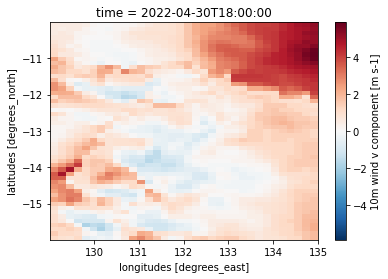

In [252]:
v_an_all['vwnd10m'].isel(time=-1).plot()

In [216]:
u_an_all.lon

<xarray.DataArray 'lon' (lon: 69)>
array([129.023438, 129.023438, 129.199219, 129.199219, 129.375   , 129.375   ,
       129.550781, 129.550781, 129.726562, 129.726563, 129.902344, 129.902344,
       130.078125, 130.078125, 130.253906, 130.253906, 130.429688, 130.429688,
       130.605469, 130.605469, 130.78125 , 130.78125 , 130.957031, 130.957031,
       131.132812, 131.132813, 131.308594, 131.308594, 131.484375, 131.484375,
       131.660156, 131.660156, 131.835938, 131.835938, 132.011719, 132.011719,
       132.1875  , 132.1875  , 132.363281, 132.363281, 132.539062, 132.539063,
       132.714844, 132.714844, 132.890625, 132.890625, 133.066406, 133.066406,
       133.242188, 133.242188, 133.417969, 133.417969, 133.59375 , 133.59375 ,
       133.769531, 133.769531, 133.945312, 133.945313, 134.121094, 134.121094,
       134.296875, 134.296875, 134.472656, 134.472656, 134.648438, 134.648438,
       134.824219, 134.824219, 135.      ])
Coordinates:
  * lon      (lon) float64 129.0 129.0 129.2 129.2 ... 134.6 134.8 134.8 135.0
Attributes:
    long_name:  longitudes
    type:       uniform
    units:      degrees_east
    valid_min:  -180.0
    valid_max:  360.0
    axis:       X

In [253]:
u_err = u_fc_all['uwnd10m'] - u_an_all['uwnd10m']
v_err = v_fc_all['vwnd10m'] - v_an_all['vwnd10m']

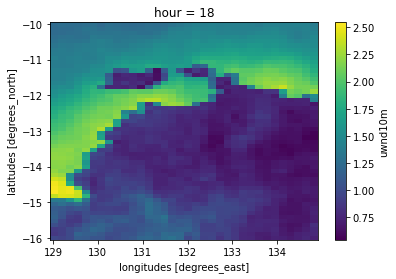

In [259]:
np.abs(u_err).groupby(u_err['time'].dt.hour).mean().isel(hour=3).plot()

In [42]:
date[4:6]

'10'

In [34]:
p_fcmm = xr.open_dataset(base_dir + date + '/' + hour + '/fcmm/ml/pressure.nc')

In [62]:
an_datetime

numpy.datetime64('2020-10-01T00:00:00')

In [22]:
z = u_fc.A_rho + u_fc.B_rho * topog['topog']

In [72]:
u_fc

<xarray.Dataset>
Dimensions:       (lat: 86, lon: 68, time: 240)
Coordinates:
  * time          (time) datetime64[ns] 2020-09-30T13:00:00 ... 2020-10-10T12...
  * lat           (lat) float32 -8.027 -8.145 -8.262 ... -17.75 -17.87 -17.99
  * lon           (lon) float32 127.1 127.3 127.4 127.6 ... 138.5 138.7 138.9
Data variables:
    forc_minutes  (time) timedelta64[ns] ...
    uwnd10m       (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5,ACDD-1.3
    institution:                     Australian Bureau of Meteorology
    source:                          APS3
    date_created:                    20201001
    summary:                         forecast data
    title:                           forecast data
    base_date:                       20200930
    base_time:                       1200
    modl_vrsn:                       ACCESS-G
    expt_id:                         0001
    DODS_EXTRA.Unlimited_Dimension:  time